# Machine Learning Algorithms

## Tree-based Methods
Tree-based methods involve partitioning the predictor space into a number of regions
(or nodes) defined by restrictions on the various predictors. For each region, a single class prediction is made for each observation that falls into that region. Classification
trees are the simplest cases of tree-based methods for classification.
Classification trees use a series of binary divisions to partition the predictor space
into J disjoint regions $R_{1} ,\ldots, R_{J}$ , beginning with the unconstrained predictor space,
and considering each predictor and each observed value on that predictor for the split
that performs best in terms of some criterion for the success of predictions. Such an
approach is referred to as **top-down and greedy**.

Although the classification error rate might be thought of as the natural metric for
classification accuracy, empirically, in the context of growing classification trees, clas-
sification accuracy is not as sensitive as other criteria, which are therefore preferred. A commonly-applied criterion is given by the Gini index, which
prefers divisions that result in nodes containing observations that are predominantly
from a single class.

$$
G = \sum_{k=1}^{K}\hat{p}_{mk}\left(1-\hat{p}_{mk}\right)
$$

$\hat{p}_{mk}$ corresponds to the proportion of observations in node $m$ that fall into class $k$. If the node consists of observations that are predominantly of one class, then the Gini index will be small, as all values for $\hat{p}_{mk}$ have values that are either close to 0 or close to 1.

Lets jump right into a simple classication tree and visualisation using a constructed dataset:


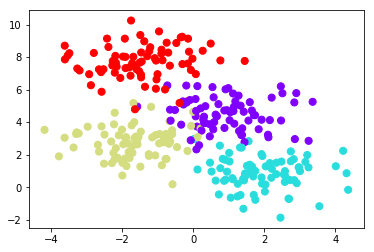

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

We' fit and visualize a number of decision trees of different depths on our dataset, visualizing the decisions and results partitioning of the feature space.

In [98]:
from utils import visualize_classifier
from sklearn.tree import DecisionTreeClassifier

# fit trees of different depths
depths = dict()
for i in range(1, 5):
    depths[f'depth{i}'] = DecisionTreeClassifier(max_depth=i)

Fontconfig warning: "/etc/fonts/conf.d/65-droid-sans-fonts.conf", line 61: Having multiple values in <test> isn't supported and may not work as expected
Fontconfig warning: "/etc/fonts/conf.d/65-droid-sans-fonts.conf", line 96: Having multiple values in <test> isn't supported and may not work as expected

Fontconfig warning: "/etc/fonts/conf.d/65-droid-sans-fonts.conf", line 61: Having multiple values in <test> isn't supported and may not work as expected
Fontconfig warning: "/etc/fonts/conf.d/65-droid-sans-fonts.conf", line 96: Having multiple values in <test> isn't supported and may not work as expected



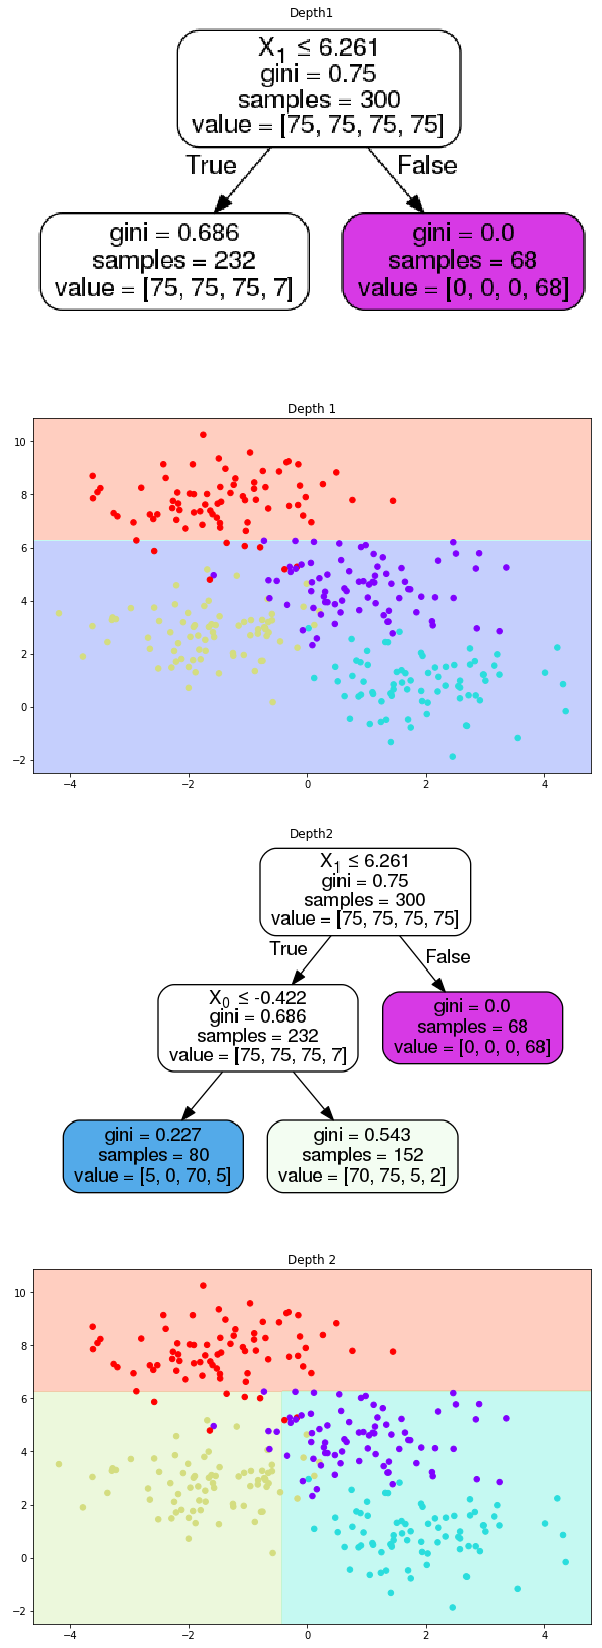

In [99]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')

def visualize_tree(model, ax, title):
    dot_data = StringIO()
    export_graphviz(model, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(f'{title}.png')
    img = mpimg.imread(f'{title}.png')
    ax.imshow(img)
    ax.set_title(title)
    ax.set_axis_off()
    
# visualize initial trees and partitions
fig, ax = plt.subplots(4, 1, figsize=(10, 30))
# depth 1
visualize_classifier(depths['depth1'], X, y,
                     ax=ax[1],
                     title='Depth 1')
visualize_tree(depths['depth1'], ax[0], 'Depth1')
# depth 2
visualize_classifier(depths['depth2'], X, y,
                     ax=ax[3],
                     title='Depth 2')
visualize_tree(depths['depth2'], ax[2], 'Depth2')

Now lets take a look at the Iris dataset.

In [106]:
import sklearn.datasets as datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [107]:
tree = DecisionTreeClassifier()
tree.fit(df,y)

print(f'Training set accuracy: {tree.score(df, y)}')

Training set accuracy: 1.0


Now for the displaying:

Fontconfig warning: "/etc/fonts/conf.d/65-droid-sans-fonts.conf", line 61: Having multiple values in <test> isn't supported and may not work as expected
Fontconfig warning: "/etc/fonts/conf.d/65-droid-sans-fonts.conf", line 96: Having multiple values in <test> isn't supported and may not work as expected



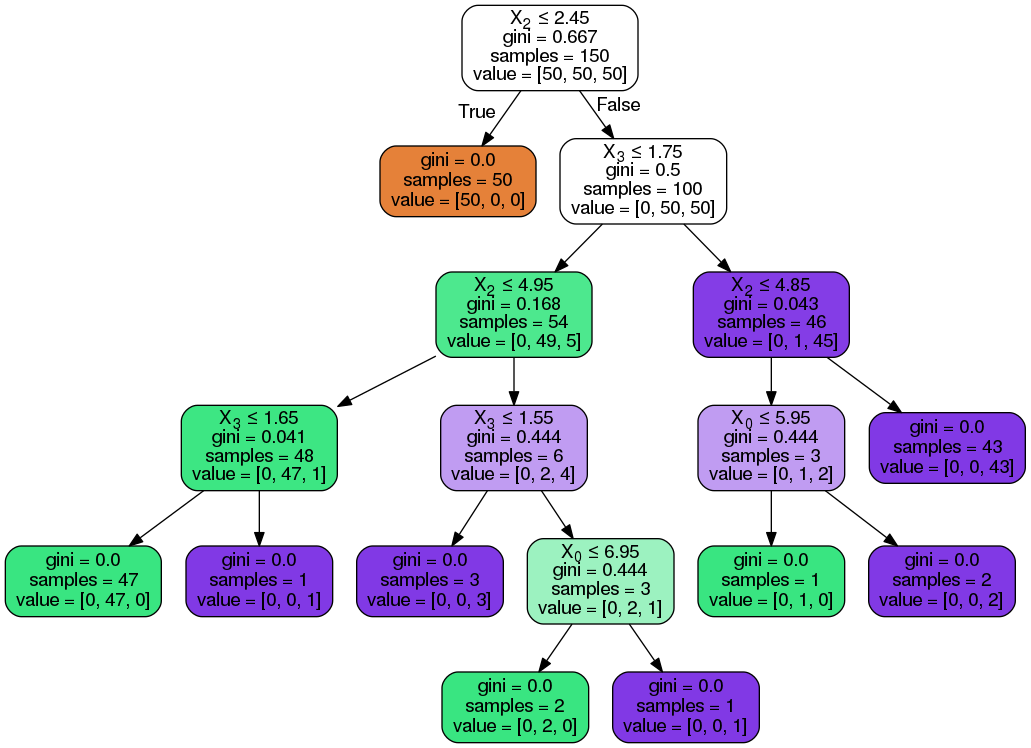

In [102]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [103]:
from matplotlib.colors import ListedColormap
from utils import plot_class_regions_for_classifier_subplot
import matplotlib.patches as mpatches
import numpy as np

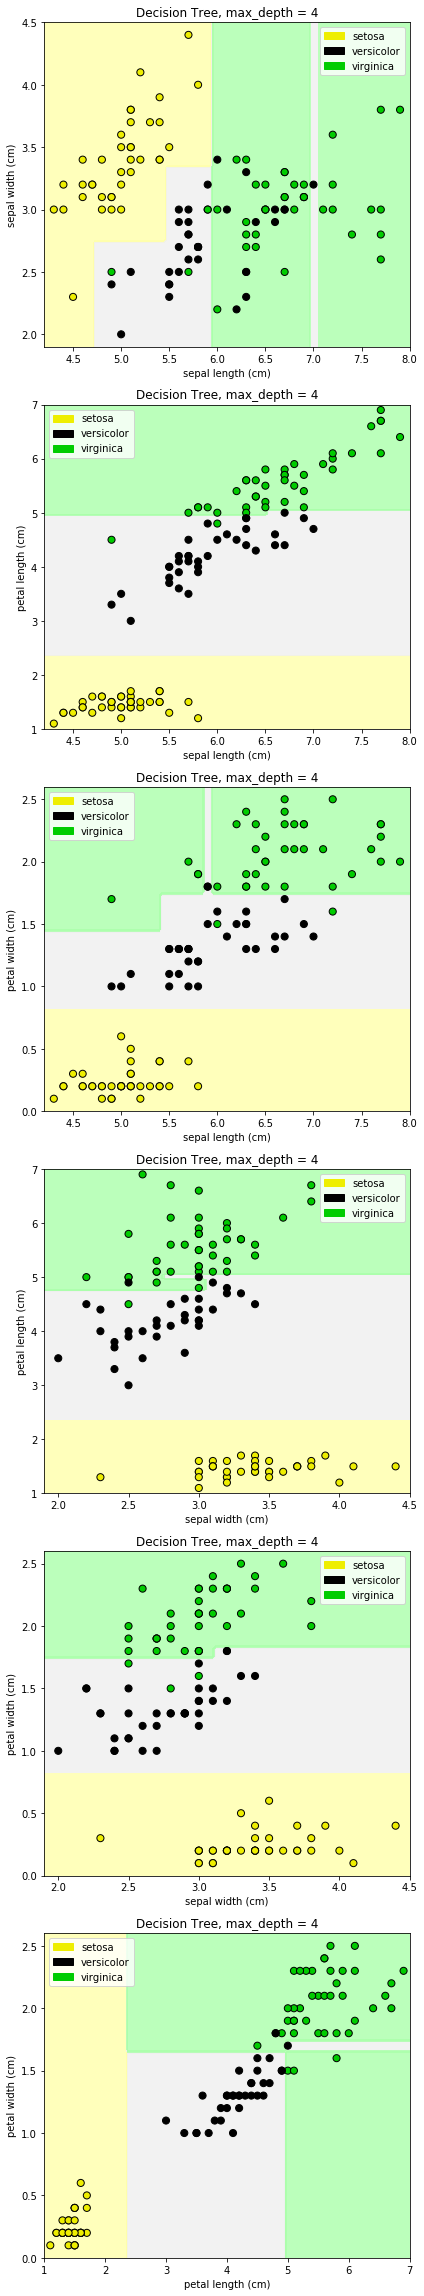

In [104]:
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train
    
    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)
    
    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])
    
plt.tight_layout()
plt.show()

## Bagging
Bagging is a tree-based method that operates within a similar paradigm to simple
classification trees, but which is designed to improve on one of their shortcomings:
high variability. It is a feature of classification trees that depending on the precise division of the training data, the trees fitted to the data could be significantly different.
Boosting is referred to as an ensemble method, as it fits a large number of trees to the
data, and *obtains a model through aggregating trees and taking majority votes for class
predictions*.

In the ideal case $B$ distinct training sets would be used to grow B distinct classification trees. For each observation x in the test set, each tree would predict a certain class
membership. The predicted class membership for observation x would then be obtained
as the majority vote of the class predictions across all $B$ trees. In practice, however,
multiple training sets are not feasible, and the reduction in variance must be obtained by
taking *repeated samples with replacement* (**bootstrap samples**) from the training data set.

For each of the $B$ trees in the bagging ensemble, a bootstrap sample is taken of the
training data set and a large, unpruned tree is grown on the bootstrap sample. For each
observation $x$ in the training set, denote the predicted class membership of the bth tree in
the bagging ensemble by $f^{*b} (x)$. Then the predicted class membership for x according
to the bagging model is given as the majority vote of $f^{*1} (x) , . . . , f^{* B} (x)$.

Bagging effectively reduces the variance of classification trees, and typically results
in significant improvements in classification accuracy. In addition, bagging results in
a natural estimate of the test error, referred to as the out-of-bag (OOB) error. On average, each bootstrap sample only contains two-thirds of the observations in the data
set; the remaining observations are termed the OOB observations. If each tree in the
bagging ensemble is used to obtain predictions on the observations which were OOB in
the bootstrap sample used to grow that tree, roughly $\frac{B}{3}$ test predictions are obtained for each observation in the dataset.


## Random Forests
Random forests define an tree-based ensemble classification approach founded on the
same approach as for bagging, but with an adjustment to reduce correlation among trees
in the bagging ensemble, and subsequently to result in a greater reduction in the vari-
ance of the tree-based method. Especially in the case of a strong predictor, trees in the
bagging ensemble are in general expected to split on this predictor high up in the tree,
even on the first split, resulting in significant correlations between trees in the bagging
ensemble.

Random forests are allowed to split on only a random sample of $m < p$ predictors at
each split point. This introduces greater variability into the variables on which the splits
are made, and the points at which the variables are split on, and therefore effectively
reduces correlation among the trees in the bagging ensemble. A heuristic for the optimal number of predictors to sample at each split point is to choose $m\approx\sqrt{p}$, where $p$ is the number of predictors in the model.


In [108]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_features=2, random_state=0)
forest.fit(df,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Because random forests are comprised of many individual trees, they can't be visualised as clearly. However, the cumulative contribution of different features to reduction in the Gini index can be visualized.

In [109]:
def plot_feature_importances(clf, feature_names):                                                                                                       
    c_features = len(feature_names)                                                                                                                     
    plt.barh(range(c_features), clf.feature_importances_)                                                                                               
    plt.xlabel("Feature importance")                                                                                                                    
    plt.ylabel("Feature name")                                                                                                                          
    plt.yticks(np.arange(c_features), feature_names)

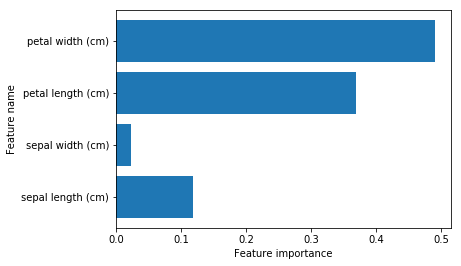

In [110]:
plot_feature_importances(forest, iris.feature_names)

**Exercise: Tree-based methods.** Explore the various tuning parameters for random forests and decision trees. See the arguments to `RandomForestClassifier`, for instance.

# Support Vector Machines

Support vector machines are based on the concept of separating hyperplanes. In a $p$-dimensional space, a hyperplane is a subspace of dimension $p − 1$ that is not constrained to pass through the origin. Defining a point $X$ in the $p$-dimensional space by $X^{\top} = (X_{1}, X_{2},\ldots,X_{p})$, and the general form of a separating hyperplan is given by:
$$
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p = 0
$$
and a separating hyperplane satisfies:
$$
y_i(\beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \ldots + \beta_p X_{ip} > 0
$$
for each observation $i = 1, ..., n$.
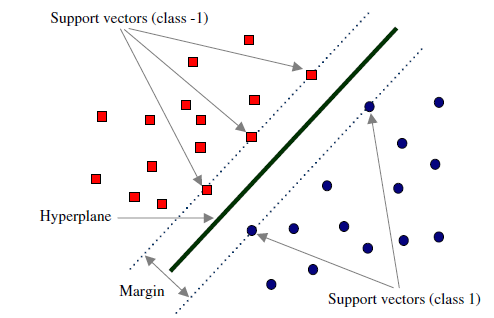

In the two class setting, the core aim of support vector machines is to find a separating hyperplane between the two classes that results in an optimal separation of the classes in some sense. A sensible first approach might be to look for the hyperplane that correctly classifier all observations and maximises the margin between the hyperplane and each observation. Such a classifier is know as a *maximum margin classifier*.

While maximum margin classifiers margin classifiers perform well enough for separable classification problems, in cases where no hyperplane exists such that all observations are correctly classified, no maximum margin exists! This fact, together with the sensitivity of maximum margin classifiers to individual observations, motivated the development of support vector classifiers.

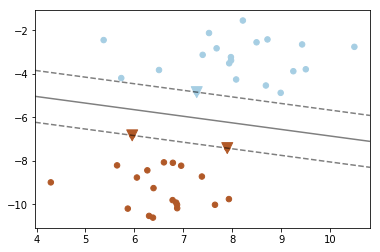

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# choose a large penalty for the error term to simulate a maximum margin classifer
clf = svm.SVC(kernel='linear', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120,
           linewidth=1, marker='v', c=y[clf.support_], cmap=plt.cm.Paired)
plt.show()


**Exercise: Maximum margin classifiers.** Add an observation that violates the current margin to the dataset, retrain the maximum margin classifier and re-plot the results. What do you observe?

Support vector classifiers have two major positive characteristics relative to maximum margin classifiers:

1. Greater robustness to individual observations;
2. Better classification of the majority of training observations.

Rather than trying to obtain the largest possible margin, the *support vector classifier*, also called a *soft margin classifier*, allows some observations to be on the incorrect side of the margin, and even of the hyperplane. Support vector classifiers essentially solve the following optimisation problem:
$$
\text{maximize}_{\beta_0,\beta_1,\ldots\epsilon_1,\ldots,\epsilon_n,M} M\\
\text{subject to} \sum_{j=1}^p\beta_j^2=1,\\
y_i(\beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \ldots + \beta_p X_{ip} \geq M(1-\epsilon_i),\\
\epsilon_i\geq 0, \sum_{i=1}^n\leq C,
$$
where $\epsilon_i$ for $i=1,\ldots, n$ are slack variables allowing margin violation, and $C$ is a parameter that specifies the tolerance for the number and severity of margin violations. These adaptations make the support vector classifier much more flexible, and applicable to a wider range of problems for which a strict linear separating hyperplane doesn't exist.

For $C > 0$ no more than $C$ observations can be on the wrong side of the hyperplane. Why? As $C$ increases, the classifier becomes more tolerant of violations to the margin, and margin will in general widen. A classifier with a low value of $C$ will tend to be highly fit to the data, with low bias and high variance.

The optimisation problem for support vector machines has the fundamental property that only observations that either lie on the margin or violate the margin will affect the hyperplane; observations that lie strictly on the correct side of the margin have no effect on the hyperplane!

**Exercise: Support vectors.** Vary the parameter $C$ in the previous example and check out the effect on the margin and the support vectors. What do you observe?

**Note:** The parameter $C$ for the `Sk-learn` SVMs is actually from a slightly different formulation of the SVM optimisation problem, and specifies a *penalty* for margin violation rather than a *tolerance*. You can think of it as the inverse of the cost parameter $C$ that we've discussed.

But what about problems that are not remotely linearly separable?

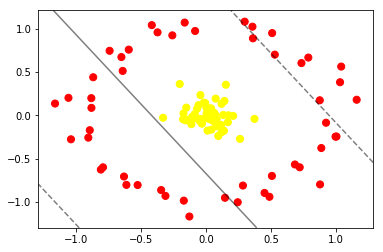

In [112]:
from sklearn.datasets.samples_generator import make_circles
from utils import plot_svc_decision_function
X, y = make_circles(100, factor=.1, noise=.1, random_state=42)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Support vector machines address precisely this problem for support vector classifiers, through enlarging the feature space using *kernels* to solve non-linear classification problems. It turns out the the solution to the support vector classifier that we defined above involves only *inner products* of observations, as opposed to the observations themselves. The inner product of two observations $x_0$ and $x_1$ with $p$ features (dimensions) is given by:
$$
\langle x_0, x_1 \rangle  = \sum_{j=1}^px_{0j}x_{1j}
$$
We can show that a linear support vector classifier can be represented as:
$$
f(x) = \beta_0 + \sum_{i=1}^n\alpha_i\langle x_, x_i \rangle
$$
Kernels are a generalisation of the inner product, which are represented by $K(x_i, x_{i'})$. For instance, the kernel 
$$
K(x_i, x_{i'}) = \sum_{j=1}^px_{ij}x_{i'j}
$$
recovers the regular inner product. However, *polynomial* kernel is far more interesting for the non-linear case:
$$
K(x_i, x_{i'}) = \left(1 + \sum_{j=1}^px_{ij}x_{i'j}\right)^d,
$$
where $d>1$. Non-linear kernels can be thought of as functions of our features that project the features into a higher-dimensional space, where a linear model can recover more complicated decision boundaries. We'll use the radial kernel, which is defined as follows:
$$
K(x_i, x_{i'}) = \exp\left(-\gamma\sum_{j=1}^p\left(x_{ij} - x_{i'j}\right)^2\right),
$$
Lets consider the above data with a radial basis function centered at $(0, 0)$.

In [113]:
r = np.exp(-(X ** 2).sum(1))

In [137]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90, 45, 30, 60], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', index=3, options=(-90, 90, 45, 30, 60), value=30), IntSlide…

After the radial basis transformation, you can see that the data becomes trivially linearly separable by a plane!

**Exercise: Application** Apply support vector machines to `fraud_data.csv`. Try to obtain the best result across choices of parameters and kernels. Report your results (ideally visually). Also, to start, give [Random Search for Hyper-Parameter Optimisation](http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf) a read.